<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/Usman_double_layered_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

x_train = train_images.reshape(-1, 28 * 28) / 255.0
x_test = test_images.reshape(-1, 28 * 28) / 255.0

In [51]:
x_train.shape

(60000, 784)

In [52]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,) ))
# Dropout(0.25)
model.add(Dense(128, activation='relu' ))
# Dropout(0.25)
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,train_labels, batch_size=64, shuffle=True,  epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7622 - loss: 0.6875 - val_accuracy: 0.8532 - val_loss: 0.4165
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8603 - loss: 0.3876 - val_accuracy: 0.8528 - val_loss: 0.4110
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8745 - loss: 0.3470 - val_accuracy: 0.8637 - val_loss: 0.3766
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8834 - loss: 0.3223 - val_accuracy: 0.8793 - val_loss: 0.3362
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8903 - loss: 0.2957 - val_accuracy: 0.8788 - val_loss: 0.3311
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8940 - loss: 0.2810 - val_accuracy: 0.8863 - val_loss: 0.3210
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9007 - loss: 0.2656 - val_accuracy: 0.8753 - val_loss: 0.3471
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9057 - loss: 0.2522 - val_accuracy: 0.

In [54]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [55]:
accuracy_score(test_labels,y_pred)

0.89

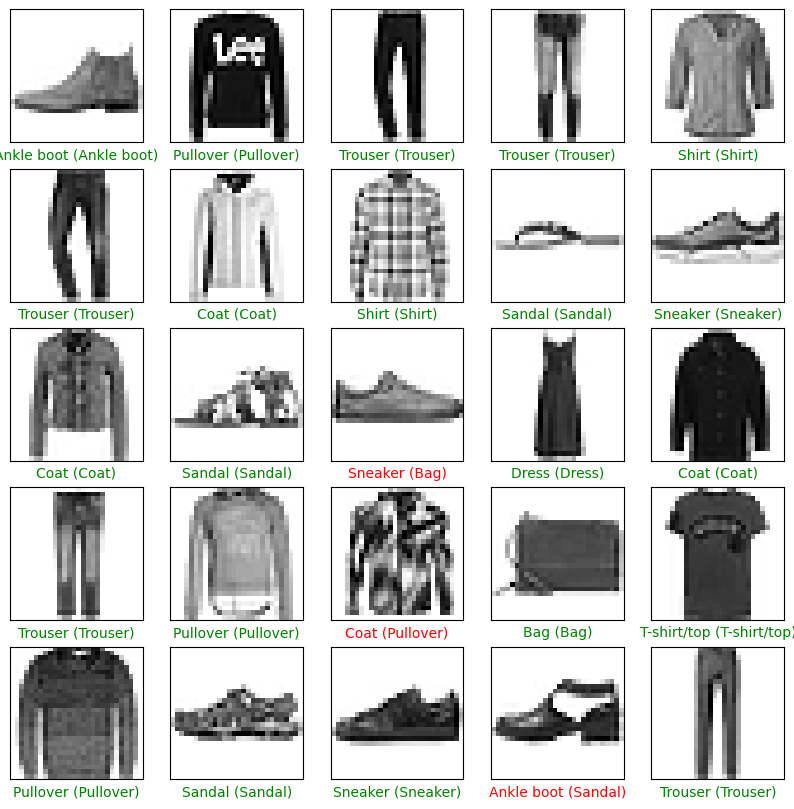

In [56]:

# Class names for the Fashion MNIST dataset
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot 25 images with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # Display in grayscale
    label_color = 'green' if test_labels[i] == y_pred[i] else 'red'
    plt.xlabel(f"{class_names[test_labels[i]]} ({ class_names[y_pred[i]]})", color=label_color )  # Show true label
plt.show()

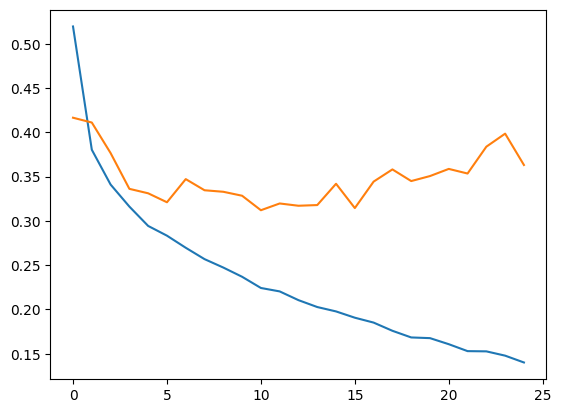

In [57]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])